In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import cv2
import numpy as np
from PIL import Image

def create_model():
    model = Sequential()
    model.add(Conv2D(64,3,1, activation = 'relu',
                     input_shape=(64,64,1), padding = 'same'))
    model.add(MaxPooling2D(pool_size= (2,2), padding = 'same'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64,3,1, activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
#     #test
    model.add(Conv2D(64,3,1, activation = 'relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(32, activation= 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation= 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation= 'sigmoid'))
    
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    
    return model

model = create_model()

model.load_weights('CMPT419-smile-testing/smile_test.h5')

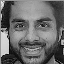

In [83]:
image_paths = os.listdir('face-extractions')

images = [cv2.imread("face-extractions/" + image_path,0) for image_path in image_paths]

images = [cv2.resize(image,(64,64)) for image in images]
display(Image.fromarray(images[5]))
images = [image.reshape(64,64,1) for image in images]

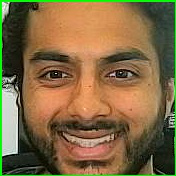

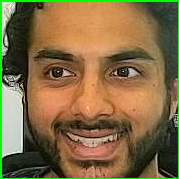

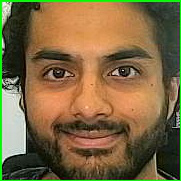

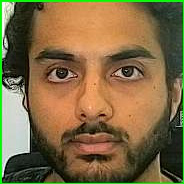

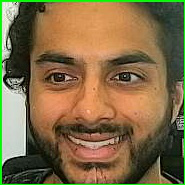

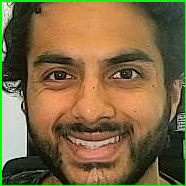

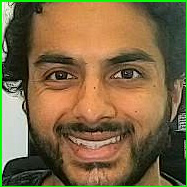

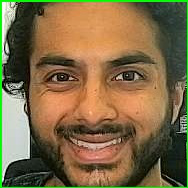

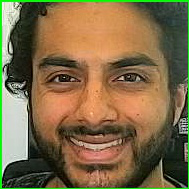

In [94]:
for path in image_paths:
    display(Image.open('face-extractions/'+path))

In [90]:
model.predict_classes(np.array(images))

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

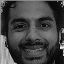

In [68]:
image = cv2.imread("219219_faces.jpg",0)
image = cv2.resize(image, (64,64))
display(Image.fromarray(image))
image = image.reshape(1,64,64,1)

In [69]:
model.predict_classes(image)

array([[1]])